In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
N_CLASS = 3

In [3]:
df = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')
xs = df.drop('Class label', axis=1).values
ys = df['Class label'].astype('int').values
print(xs.shape, xs.dtype)
print(ys.shape, ys.dtype)

(150, 15) float64
(150,) int64


In [4]:
from sklearn.datasets import load_wine
xs, ys = load_wine(return_X_y=True)
print(xs.shape, xs.dtype)
print(ys.shape, ys.dtype)

(178, 13) float64
(178,) int64


In [5]:
std = StandardScaler()
xs_std = std.fit_transform(xs)

In [6]:
class MyPCA:
    def __init__(self, n_components=1):
        self.n_components = n_components
        
    def fit(self, A):
        C = (A.T @ A) / len(A)
        val, vec = LA.eigh(C)
        idx = np.argsort(-np.abs(val))
        idx = idx[:self.n_components]
        self.P = np.stack(vec.T[idx], axis=0).T
        
    def transform(self, A):
        return A @ self.P
    
    def fit_transform(self, A):
        self.fit(A)
        return self.transform(A)

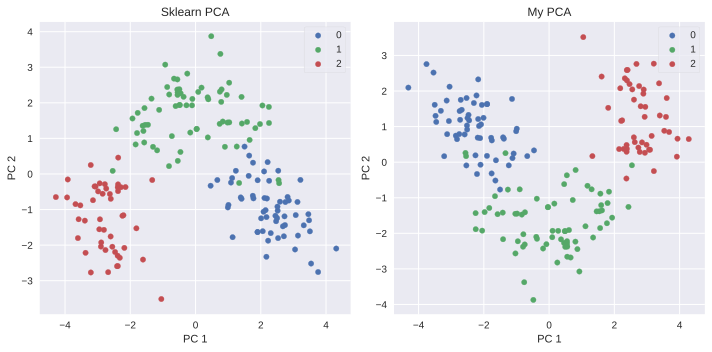

In [15]:
xs_pca1 = PCA(n_components=2).fit_transform(xs_std)
xs_pca2 = MyPCA(n_components=2).fit_transform(xs_std)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
for y in range(N_CLASS):
    ax[0].scatter(xs_pca1[ys == y, 0], xs_pca1[ys == y, 1], s=30, label=y)
    ax[1].scatter(xs_pca2[ys == y, 0], xs_pca2[ys == y, 1], s=30, label=y)
ax[0].legend(frameon=True)
ax[0].set_title('Sklearn PCA')
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].legend(frameon=True)
ax[1].set_title('My PCA')
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
fig.tight_layout()
plt.show()

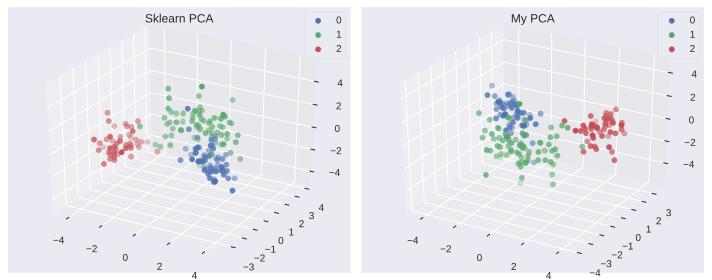

In [19]:
xs_pca1 = PCA(n_components=3).fit_transform(xs_std)
xs_pca2 = MyPCA(n_components=3).fit_transform(xs_std)

fig = plt.figure(figsize=(10, 4), dpi=100)
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')
for y in range(N_CLASS):
    ax0.scatter(xs_pca1[ys == y, 0], xs_pca1[ys == y, 1], xs_pca1[ys == y, 2], label=y, s=30)
    ax1.scatter(xs_pca2[ys == y, 0], xs_pca2[ys == y, 1], xs_pca2[ys == y, 2], label=y, s=30)
ax0.legend(frameon=True)
ax0.set_title('Sklearn PCA')
ax1.legend(frameon=True)
ax1.set_title('My PCA')
fig.tight_layout()
plt.show()